<a href="https://colab.research.google.com/github/jhgan00/cxr-detector/blob/master/cxr_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CXR Detector

> - [YOLO v3](https://github.com/AlexeyAB/darknet): Detecting "L" letter from CXR images
>
> - mAP\@0.5 on the test dataset: 0.9998
>
> - mAP\@0.5 on the [RSNA pneumonia detection challenge dataset](https://www.kaggle.com/c/rsna-pneumonia-detection-challenge): 0.2020

# 0. Build

```
import os
os.chdir("./drive/My Drive/")
!git clone https://github.com/AlexeyAB/darknet.git
os.chdir("darknet")
!sed '1 s/^.*$/GPU=1/; 2 s/^.*$/CUDNN=1/' -i Makefile
!make
```

# 1. Train



## 1.1 Config

- \# of train images: 1,800
- \# of valid images: 200
- \# of test images: 200

params|values
---|---
batch|64
subdivisions|16
width|416
height|416
channels|3
momentum|0.9
decay|0.0005
angle|0
saturation|1.5
exposure|1.5
hue|0.1
learning_rate|0.001
burn_in|1000
max_batches|6000
policy|steps
steps|4800,5400
scales|0.1,0.1

## 1.2. Training


In [ ]:
import os
os.chdir("drive/My Drive/darknet")
!chmod +x darknet

In [ ]:
!cat cfg/cxr.data

- Start training with Darknet53.Conv.74 weights pretrained for classification on the ImageNet dataset 

In [ ]:
!./darknet detector train \
    cfg/cxr.data \
    cfg/cxr_yolov3_train.cfg \
    darknet53.conv.74 \
    -dont_show -map

- Restore the latest checkpoint & continue training

In [ ]:
!./darknet detector train \
    cfg/cxr.data \
    cfg/cxr_yolov3_train.cfg \
    backup/cxr_yolov3_train_last.weights \
    -dont_show -map

## 1.3. Check validation samples

#### 1.3.1. Output images

In [ ]:
!./darknet detector test \
    cfg/cxr.data \
    cfg/cxr_yolov3_train.cfg \
    backup/cxr_yolov3_train_best.weights \
    images/000-pgan-cxr_abnormal-preset-v2-1gpu-fp32-network-snapshot-014000-001285.png

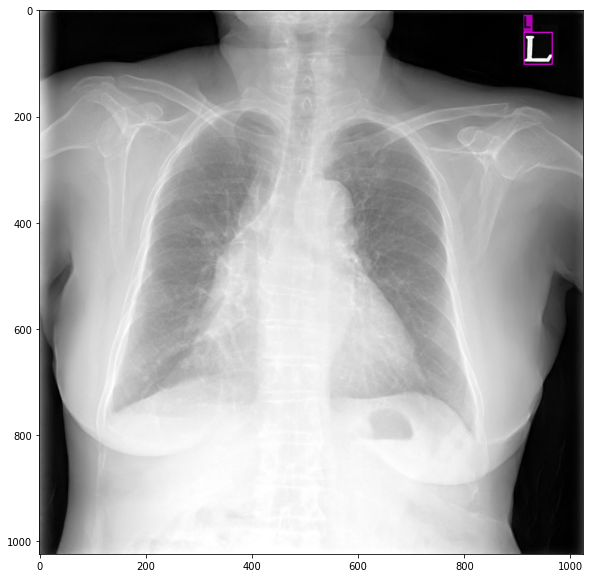

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(plt.imread("predictions.jpg"))

### 1.3.2. **1.00 mAP** at IoU=50




In [ ]:
!./darknet detector map \
    cfg/cxr.data \
    cfg/cxr_yolov3_train.cfg \
    backup/cxr_yolov3_train_best.weights > tmp.txt

```bash
detections_count = 282, unique_truth_count = 200  
class_id = 0, name = L, ap = 100.00%   	 (TP = 200, FP = 0) 

 for conf_thresh = 0.25, precision = 1.00, recall = 1.00, F1-score = 1.00 
 for conf_thresh = 0.25, TP = 200, FP = 0, FN = 0, average IoU = 77.03 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 1.000000, or 100.00 % 
Total Detection Time: 145 Seconds
```

# 2. Test

- mAP after 1,600 iterations(batches)

## 2.1. PGAN Test dataset: **0.9998 mAP** at IoU=50

In [ ]:
!./darknet detector map \
    cfg/cxr-test.data \
    cfg/cxr_yolov3_test.cfg \
    backup/cxr_yolov3_train_best.weights

```
 detections_count = 274, unique_truth_count = 197  
class_id = 0, name = L, ap = 99.42%   	 (TP = 194, FP = 0) 

 for conf_thresh = 0.25, precision = 1.00, recall = 0.98, F1-score = 0.99 
 for conf_thresh = 0.25, TP = 194, FP = 0, FN = 3, average IoU = 79.09 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.994191, or 99.42 % 
```

In [ ]:
!./darknet detector map \
    cfg/cxr-test.data \
    cfg/cxr_yolov3_test.cfg \
    backup/cxr_yolov3_train_last.weights

```
class_id = 0, name = L, ap = 99.98%   	 (TP = 195, FP = 0) 

 for conf_thresh = 0.25, precision = 1.00, recall = 0.99, F1-score = 0.99 
 for conf_thresh = 0.25, TP = 195, FP = 0, FN = 2, average IoU = 72.99 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.999848, or 99.98 %
 ```

## 2.2. RSNA Pneumonia detection dataset: 0.1232 mAP at IoU=50

In [ ]:
!./darknet detector map \
    cfg/cxr-kaggle-test.data \
    cfg/cxr_yolov3_test.cfg \
    backup/cxr_yolov3_train_best.weights

```
detections_count = 1049, unique_truth_count = 181  
class_id = 0, name = L, ap = 12.32%   	 (TP = 43, FP = 143) 

 for conf_thresh = 0.25, precision = 0.23, recall = 0.24, F1-score = 0.23 
 for conf_thresh = 0.25, TP = 43, FP = 143, FN = 138, average IoU = 14.08 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.123228, or 12.32 % 
```

In [ ]:
!./darknet detector map \
    cfg/cxr-kaggle-test.data \
    cfg/cxr_yolov3_test.cfg \
    backup/cxr_yolov3_train_last.weights

```
class_id = 0, name = L, ap = 10.52%   	 (TP = 23, FP = 38) 

 for conf_thresh = 0.25, precision = 0.38, recall = 0.13, F1-score = 0.19 
 for conf_thresh = 0.25, TP = 23, FP = 38, FN = 158, average IoU = 23.68 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.105236, or 10.52 % 
```

# 3. Improving detection performance by data augmentation

- [CFG Parameters in the `[net]` section](https://github.com/AlexeyAB/darknet/wiki/CFG-Parameters-in-the-%5Bnet%5D-section)

## 3.1. Config

- Add blur, mosaic, gaussian noise


params|values
---|---
batch|64
subdivisions|16
width|416
height|416
channels|3
momentum|0.9
decay|0.0005
angle|0
saturation|1.5
exposure|1.5
hue|0.1
learning_rate|0.001
burn_in|1000
max_batches|6000
policy|steps
steps|4800,5400
scales|0.1,0.1
blur|1
mosaic|1
gaussian_noise|1

## 3.2. Training

- Start training with Darknet53.Conv.74 weights pretrained for classification on the ImageNet dataset 

In [ ]:
!./darknet detector train \
    cfg/cxr-aug.data \
    cfg/cxr_yolov3_train_aug.cfg \
    darknet53.conv.74 \
    -dont_show -map

- Restore the latest checkpoint & continue training

In [ ]:
!./darknet detector train \
    cfg/cxr-aug.data \
    cfg/cxr_yolov3_train_aug.cfg \
    aug-backup/cxr_yolov3_train_aug_last.weights \
    -dont_show -map

## 3.3. Validation & Test

dataset|mAP@.5|weight
---|---|---
validation|1.00|best
validation|1.00|last
test|0.9597|best
test|0.9581|last
test-RSNA|0.1086|best
test-RSNA|0.2020|last


### 3.3.1. Validation: 1.00 mAP at IoU=50

In [ ]:
!./darknet detector map \
    cfg/cxr.data \
    cfg/cxr_yolov3_test.cfg \
    aug-backup/cxr_yolov3_train_aug_best.weights \

```
class_id = 0, name = L, ap = 100.00%   	 (TP = 200, FP = 0) 

 for conf_thresh = 0.25, precision = 1.00, recall = 1.00, F1-score = 1.00 
 for conf_thresh = 0.25, TP = 200, FP = 0, FN = 0, average IoU = 82.69 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 1.000000, or 100.00 % 
```

In [ ]:
!./darknet detector map \
    cfg/cxr.data \
    cfg/cxr_yolov3_test.cfg \
    aug-backup/cxr_yolov3_train_aug_last.weights \

```
class_id = 0, name = L, ap = 100.00%   	 (TP = 198, FP = 1) 

 for conf_thresh = 0.25, precision = 0.99, recall = 0.99, F1-score = 0.99 
 for conf_thresh = 0.25, TP = 198, FP = 1, FN = 2, average IoU = 78.93 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.999950, or 100.00 % 
 ```

### 3.3.2. PGAN test dataset: 0.9597 mAP at IoU=50

- We have slight decrease of mAP on the test dataset 

In [ ]:
!./darknet detector map \
    cfg/cxr-test.data \
    cfg/cxr_yolov3_test.cfg \
    aug-backup/cxr_yolov3_train_aug_best.weights \

```
class_id = 0, name = L, ap = 95.97%   	 (TP = 191, FP = 4) 

 for conf_thresh = 0.25, precision = 0.98, recall = 0.97, F1-score = 0.97 
 for conf_thresh = 0.25, TP = 191, FP = 4, FN = 6, average IoU = 67.97 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.959717, or 95.97 % 
```

In [ ]:
!./darknet detector map \
    cfg/cxr-test.data \
    cfg/cxr_yolov3_test.cfg \
    aug-backup/cxr_yolov3_train_aug_last.weights \

```
class_id = 0, name = L, ap = 95.81%   	 (TP = 188, FP = 5) 

 for conf_thresh = 0.25, precision = 0.97, recall = 0.95, F1-score = 0.96 
 for conf_thresh = 0.25, TP = 188, FP = 5, FN = 9, average IoU = 77.17 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.958122, or 95.81 % 
 ```

### 3.3.3. RSNA pneumonia detection dataset: 0.2020 mAP at IoU=50

- The performance of the best params is poor on the RSNA pneumonia dataset

In [ ]:
!./darknet detector map \
    cfg/cxr-kaggle-test.data \
    cfg/cxr_yolov3_test.cfg \
    aug-backup/cxr_yolov3_train_aug_best.weights \

```
class_id = 0, name = L, ap = 10.86%   	 (TP = 51, FP = 279) 

 for conf_thresh = 0.25, precision = 0.15, recall = 0.28, F1-score = 0.20 
 for conf_thresh = 0.25, TP = 51, FP = 279, FN = 130, average IoU = 9.37 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.108617, or 10.86 % 
 ```


- But we have slight increase of mAP on the RSNA pneumonia detection dataset using the last params


In [ ]:
!./darknet detector map \
    cfg/cxr-kaggle-test.data \
    cfg/cxr_yolov3_test.cfg \
    aug-backup/cxr_yolov3_train_aug_last.weights \

```
class_id = 0, name = L, ap = 20.20%   	 (TP = 59, FP = 121) 

 for conf_thresh = 0.25, precision = 0.33, recall = 0.33, F1-score = 0.33 
 for conf_thresh = 0.25, TP = 59, FP = 121, FN = 122, average IoU = 20.11 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.201966, or 20.20 % 
```

# 참고자료

- [darknet](https://github.com/AlexeyAB/darknet)
- [RSNA pneumonia detection challenge dataset](https://www.kaggle.com/c/rsna-pneumonia-detection-challenge)
- [Yolo_Label](https://github.com/developer0hye/Yolo_Label)